In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import zscore
#zscore is x - (mu / sigma) ## x = data, mu = mean , sigma = std deviation

In [9]:
custData = pd.read_csv('Cust_Spend_Data.csv')
custData.head()

#we have to do customer segmentation. Using clustering methods

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [10]:
# we dont need 1st two columns so we use iloc:

custDataAttr = custData.iloc[:, 2:]  #[every row, 2nd column onwards]
custDataAttr.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3


In [11]:
custDataScaled = custDataAttr.apply(zscore)
custDataScaled.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033


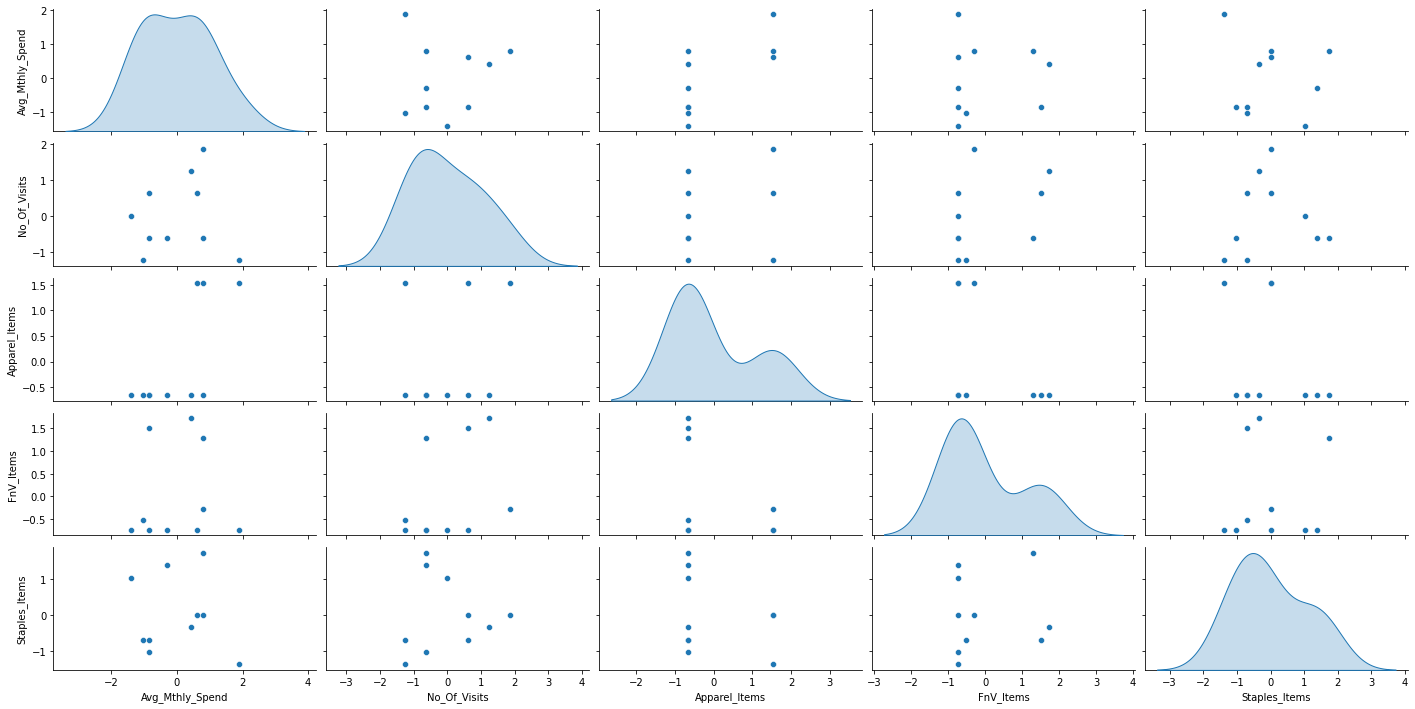

In [12]:
sns.pairplot(custDataScaled, height=2, aspect=2, diag_kind = 'kde')

#we get a hint that about two clusters might be created (not necessarily)

### Clustering

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
model = AgglomerativeClustering(n_clusters = 3, linkage = 'average', affinity = 'euclidean')

#agglomerative clustering is type of clustering
# n_clusters is no. of clusters
# linkage= average; means we are taking the average of all distances between data points
# affinity = euclidean; we are taking euclidean distance

In [15]:
model.fit(custDataScaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [16]:
custDataAttr['labels'] = model.labels_
custDataAttr.head()

#we create a column called labels where we divide all into two categories 1 and 0

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,0
1,7000,3,0,10,9,1
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0
4,6000,6,0,12,3,1


In [19]:
custDataClust = custDataAttr.groupby(['labels'])

In [20]:
custDataClust.mean()

#we can infer that label 1 spends more than 0. OR label 0 visited store more than 1. etc

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,7833.333333,4.666667,1.0,1.666667,2.666667
1,5166.666667,4.666667,0.0,11.000000,4.666667
2,2375.000000,3.000000,0.0,1.250000,4.500000


### Creating a dendrogram

In [27]:
 from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [29]:
from scipy.spatial.distance import pdist   #pariwise distribution between data points

In [30]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram.
# closer it is to 1, the better is the clustering.

Z = linkage(custDataScaled, metric='euclidean', method='average')   ## medhod is 'average'
c, coph_dists = cophenet(Z , pdist(custDataScaled))

c

0.8681149436293064

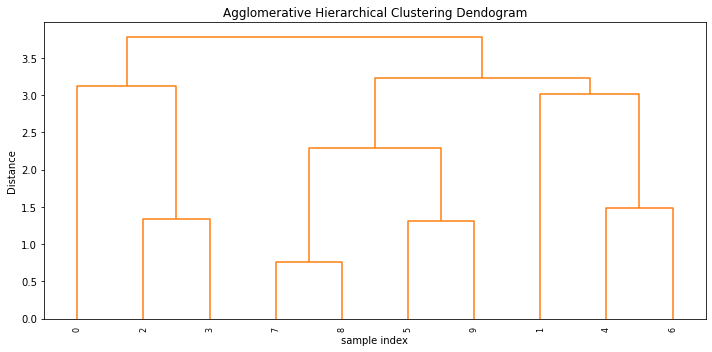

In [33]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')

dendrogram(Z, leaf_rotation=90,color_threshold = 40, leaf_font_size=8)

plt.tight_layout()

In [34]:
#method 'complete'

Z = linkage(custDataScaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(custDataScaled))
c

0.8606955190809153

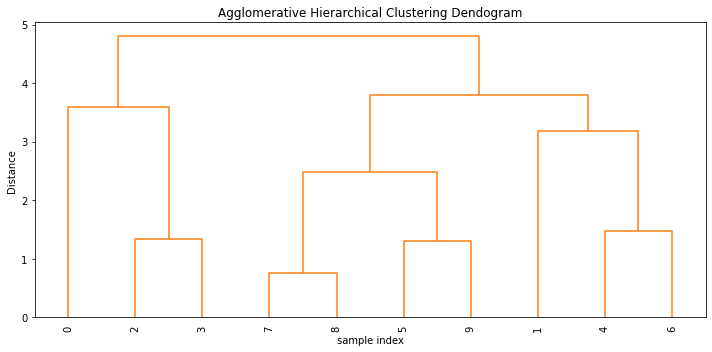

In [37]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')

dendrogram(Z, leaf_rotation=90,color_threshold=90,  leaf_font_size=10)
plt.tight_layout()

In [38]:
#method 'ward'

z = linkage(custDataScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(z, pdist(custDataScaled))
c

0.8453818941339526

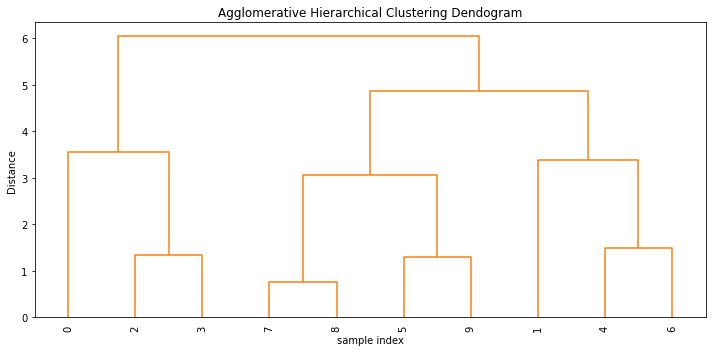

In [39]:
plt.figure(figsize=(10,5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')

dendrogram(z, leaf_rotation=90, color_threshold=600, leaf_font_size=10)
plt.tight_layout()